In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. How to read data from database

In [3]:
%%capture
%load_ext sql
%sql sqlite:///zomato_rawdata.sqlite

In [4]:
%%sql

SELECT *
  FROM sqlite_master
 WHERE type='table';

 * sqlite:///zomato_rawdata.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,Users,Users,2,"CREATE TABLE ""Users"" ( ""index"" BIGINT, url TEXT, address TEXT, name TEXT, online_order TEXT, book_table TEXT, rate TEXT, votes BIGINT, phone TEXT, location TEXT, rest_type TEXT, dish_liked TEXT, cuisines TEXT, ""approx_cost(for two people)"" TEXT, reviews_list TEXT, menu_item TEXT, ""listed_in(type)"" TEXT, ""listed_in(city)"" TEXT)"


In [5]:
import sqlalchemy as sqla

In [6]:
db = sqla.create_engine("sqlite:///zomato_rawdata.sqlite")

In [7]:
df = pd.read_sql("SELECT * FROM users", db)

In [8]:
df.sample(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
11036,11036,https://www.zomato.com/bangalore/rajanna-military-hotel-jayanagar?context=ey...,"1253, 25th A Main, 41 Cross, 9th Block, Jayanagar, Bangalore",Rajanna Military Hotel,Yes,No,4.1/5,164,+91 9686373527,Jayanagar,Quick Bites,"Biryani, Chicken Curry, Paya Soup, Paratha, Mutton Keema, Chicken Guntur, Pe...","Biryani, Fast Food",400,"[('Rated 1.0', 'RATED\n I have no idea how this place is rated so high! A b...",[],Dine-out,BTM
11532,11532,https://www.zomato.com/bangalore/fandom-at-gillys-redefined-koramangala-4th-...,"413, 100 Feet Road, Next to E-Zone, Koramangala 4th Block, Bangalore",Fandom at Gilly's Redefined,No,No,3.9/5,105,+91 9606443393\r\n+91 9606443394,Koramangala 4th Block,Bar,"Onion Rings, French Fries",Finger Food,"1,500","[('Rated 4.0', ""RATED\n I visited this place on a Friday. Visited here afte...",[],Pubs and bars,BTM
17439,17439,https://www.zomato.com/bangalore/mangalas-tea-time-cafe-koramangala-1st-bloc...,"5, 1st Main, Jakkasandra Extension, Koramangala 1st Block, Bangalore",Mangala's Tea Time Cafe,Yes,No,None,0,+91 9901474138,Koramangala 1st Block,Quick Bites,None,"Tea, Fast Food",150,"[('Rated 1.0', 'RATED\n Ordered undampori online and got old burnt ones'), ...",[],Dine-out,HSR
9197,9197,https://www.zomato.com/bangalore/chulha-chauki-da-dhaba-jp-nagar?context=eyJ...,"13, 7th Cross, 2nd Phase, JP Nagar, Bangalore",Chulha Chauki Da Dhaba,Yes,No,4.3/5,2374,080 41204283\r\n+91 7349738056,JP Nagar,Casual Dining,"Egg Chilli, Chilli Babycorn, Chicken Curry, Sweet Lassi, Palak Paneer, Chaac...",North Indian,800,"[('Rated 5.0', ""RATED\n Chulha Chauki Da Dhaba Jp Nagar\nOne of the best pl...",[],Delivery,BTM
5933,5933,https://www.zomato.com/bangalore/the-culinarium-vasanth-nagar-bangalore?cont...,"The Hatworks Boulevard, 32, Cunningham Road, Bangalore",The Culinarium,No,No,3.7/5,22,+91 8043754299,Vasanth Nagar,"Cafe, Dessert Parlor",None,"Cafe, Desserts, Beverages","1,100","[('Rated 5.0', 'RATED\n The best pot pies and fish and chips in town. The i...",[],Desserts,Brigade Road


In [9]:
df.shape

(51717, 18)

In [10]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
df.isna().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
df.isna().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [13]:
df["rate"].value_counts()

rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [14]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
df.replace(to_replace={"rate":{"-":np.nan,"NEW":np.nan}}, inplace=True)

In [16]:
def rate(x):
    try:
        return float(x.split("/")[0])
    except:
        return x

In [17]:
df["rate"] = df["rate"].apply(rate)

In [18]:
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

### 3. Is there a relation between online order option and rating of the restaurant !

In [19]:
df.sample(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
35319,35319,https://www.zomato.com/bangalore/bombay-sandwich-company-koramangala-7th-blo...,"1st Floor, 1st Cross, Next To Bosch Back Gate, Near Someshwara Swamy Temple,...",Bombay Sandwich Company,Yes,No,3.6,34,080 41202278\n+91 7829745705,Koramangala 7th Block,Delivery,None,"Sandwich, Beverages",400,"[('Rated 1.0', 'RATED\n I ordered spicy aloo sandwich from Zomato and they ...","['Balle Balle Paneer Sandwich', 'Kukkad Sandwich', 'Lebanese Falafel Sandwic...",Delivery,Koramangala 7th Block
7565,7565,https://www.zomato.com/bangalore/hasee-e-shan-makers-of-biryani-whitefield-b...,"107/P4, Pattandur Agrahara Village, Near ITPL Back Gate 3, Whitefield, Banga...",Hasee-E-Shan Makers Of Biryani,Yes,No,3.5,15,+91 6363891968,Whitefield,Casual Dining,None,"Biryani, Mughlai, North Indian",500,"[('Rated 5.0', 'RATED\n very good'), ('Rated 5.0', 'RATED\n A must visit p...","['Mutton Kasa', 'Chicken Biryani', 'Boneless Chicken Biryani', 'Special Bone...",Delivery,Brookefield
30403,30403,https://www.zomato.com/bangalore/now-momos-koramangala-7th-block?context=eyJ...,"4/1, 1st Main Road, Opposite Forum Mall, Bhuvanappa Layout, Koramangala 7th ...",Now Momos,No,No,3.4,11,+91 8918480793,Koramangala 7th Block,Quick Bites,None,"Chinese, Fast Food, Momos",200,"[('Rated 1.0', ""RATED\n Pathetic Momo's. I ordered fried momos but the momo...",[],Delivery,Koramangala 5th Block


In [20]:
df1 = df[df["online_order"]=="Yes"]

In [21]:
df2 = df[df["online_order"]=="No"] 

In [22]:
a=df1.groupby("rate")["url"].count().reset_index()
a.rename(columns={"url":"yes"}, inplace=True)
a

,rate,yes
0,2.1,15
1,2.2,16
2,2.3,22
3,2.4,34
4,2.5,63
...,...,...
24,4.5,359
25,4.6,160
26,4.7,54
27,4.8,32


In [23]:
b=df2.groupby("rate")["url"].count().reset_index()
b.rename(columns={"url":"no"}, inplace=True)
b

,rate,no
0,1.8,5
1,2.0,11
2,2.1,9
3,2.2,10
4,2.3,29
...,...,...
26,4.5,297
27,4.6,140
28,4.7,113
29,4.8,34


In [24]:
c=pd.merge(a,b,on="rate",how="outer")
c

,rate,yes,no
0,2.1,15.0,9
1,2.2,16.0,10
2,2.3,22.0,29
3,2.4,34.0,36
4,2.5,63.0,38
...,...,...,...
26,4.7,54.0,113
27,4.8,32.0,34
28,4.9,43.0,12
29,1.8,NaN,5


In [25]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [26]:
d = df.pivot_table(index="rate", columns="online_order",values="votes", aggfunc="count")
d

online_order,No,Yes
rate,,
1.8,5.0,NaN
2.0,11.0,NaN
2.1,9.0,15.0
2.2,10.0,16.0
2.3,29.0,22.0
...,...,...
4.5,297.0,359.0
4.6,140.0,160.0
4.7,113.0,54.0


In [27]:
# another way for creating pivot table
pd.crosstab(index=df["rate"],columns=df["online_order"])

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
...,...,...
4.5,297,359
4.6,140,160
4.7,113,54


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1.8'),
  Text(1, 0, '2.0'),
  Text(2, 0, '2.1'),
  Text(3, 0, '2.2'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.6'),
  Text(8, 0, '2.7'),
  Text(9, 0, '2.8'),
  Text(10, 0, '2.9'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.1'),
  Text(13, 0, '3.2'),
  Text(14, 0, '3.3'),
  Text(15, 0, '3.4'),
  Text(16, 0, '3.5'),
  Text(17, 0, '3.6'),
  Text(18, 0, '3.7'),
  Text(19, 0, '3.8'),
  Text(20, 0, '3.9'),
  Text(21, 0, '4.0'),
  Text(22, 0, '4.1'),
  Text(23, 0, '4.2'),
  Text(24, 0, '4.3'),
  Text(25, 0, '4.4'),
  Text(26, 0, '4.5'),
  Text(27, 0, '4.6'),
  Text(28, 0, '4.7'),
  Text(29, 0, '4.8'),
  Text(30, 0, '4.9')])

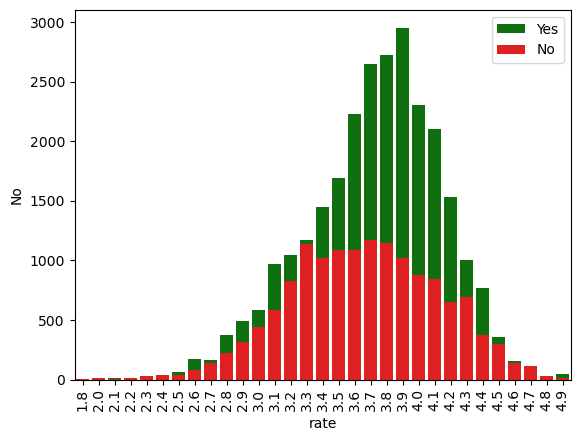

In [28]:
sns.barplot(data=d, x=d.index, y="Yes", color="green", label="Yes")
sns.barplot(data=d, x=d.index, y="No",label="No",color="red")
plt.legend()
plt.xticks(rotation=90)

<Axes: xlabel='rate'>

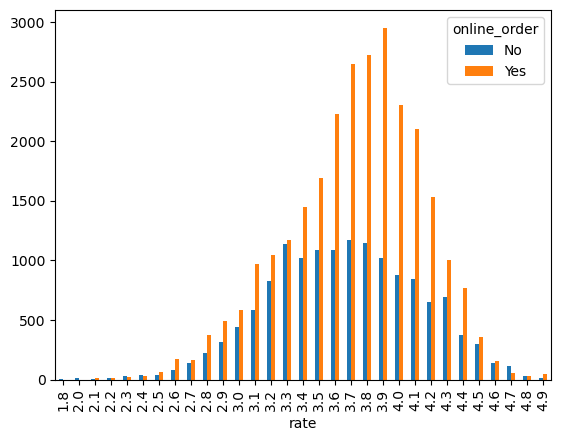

In [29]:
d.plot(kind="bar")

<Axes: xlabel='rate'>

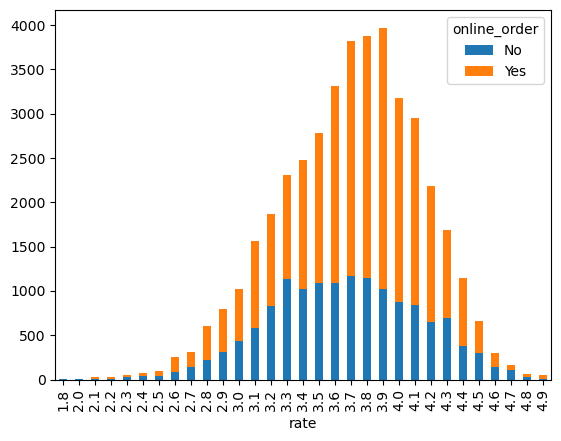

In [30]:
d.plot(kind="bar",stacked=True)

In [31]:
#100% stacked bar

In [32]:
d.fillna(0,inplace=True)

In [33]:
e=pd.DataFrame()
e.index=d.index
e["No"] = d["No"] / (d["Yes"]+d["No"]) *100
e["Yes"] = d["Yes"] / (d["Yes"]+d["No"]) *100

In [34]:
e

,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
...,...,...
4.5,45.274390,54.725610
4.6,46.666667,53.333333
4.7,67.664671,32.335329


<Axes: xlabel='rate'>

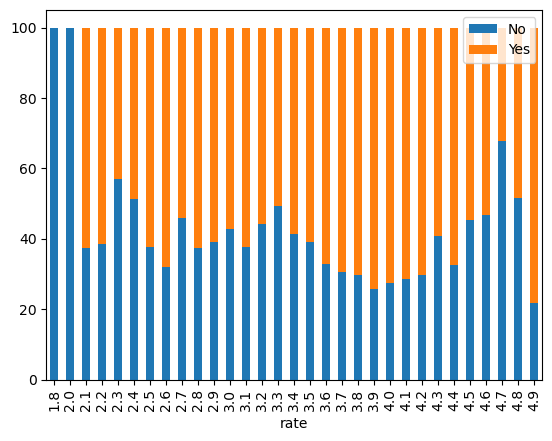

In [35]:
e.plot(kind="bar", stacked=True)

In [36]:
#another way of creating e

In [37]:
d.sum(axis=1)

rate
1.8      5.0
2.0     11.0
2.1     24.0
2.2     26.0
2.3     51.0
       ...  
4.5    656.0
4.6    300.0
4.7    167.0
4.8     66.0
4.9     55.0
Length: 31, dtype: float64

In [38]:
d.div(d.sum(axis=1),axis=0)

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
...,...,...
4.5,0.452744,0.547256
4.6,0.466667,0.533333
4.7,0.676647,0.323353


#### We can conclude from the above plot that restaurants with online ordering facility having more amount of good ratings comapared to restaurants without online ordering facility

### 4. Data cleaning to perform Text Analysis

In [39]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', None, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
     

In [40]:
df['rest_type'].isna().sum()

227

In [41]:
data = df.dropna(subset=["rest_type"])

In [42]:
data['rest_type'].isna().sum()

0

In [43]:
#lets analyse for Quick Bites restaurant

In [44]:
quick_bites_df = data[data["rest_type"].str.contains("Quick Bites")]

In [45]:
quick_bites_df.shape

(20639, 18)

In [46]:
quick_bites_df['reviews_list'][3]

'[(\'Rated 4.0\', "RATED\\n  Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it\'s well managed............"), (\'Rated 2.0\', \'RATED\\n  Reached the place at 3pm on Saturday. Half of the items on the menu were over. What was annoying was is the food was cold. The taste was also very average. Only dosa and holige were good. There were very few people in the restaurant and the service was still very slow. The waiters were all standing in one corner and talking. Had to call them repeatedly.\'), (\'Rated 4.0\', \'RATED\\n  Had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. One of the good hotel there for this price.\'), (\'Rated 2.0\', \'RATED\\n  How can a Udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.Why cant they clean it? The floor even had decorative colour paper every where and lot of food.Now com

In [47]:
x=quick_bites_df['reviews_list'][3].lower()

In [48]:
import re

In [49]:
re.findall("[a-z]+",x)

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [50]:
# l=[]
# for i in quick_bites_df['reviews_list']:
#     l=l+re.findall("[a-z]+",i.lower())

In [51]:
#another way

In [52]:
from nltk.corpus import RegexpTokenizer

In [53]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [54]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [55]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3].lower())

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [56]:
# l=[]
# for i in quick_bites_df['reviews_list']:
#     l=l+tokenizer.tokenize(i.lower())

In [57]:
review_tokens = quick_bites_df['reviews_list'].apply(lambda x : tokenizer.tokenize(x.lower()))

### 5. Perform Unigram analysis & removal of stopwords ...

In [58]:
review_tokens

3        [rated, rated, n, great, food, and, proper, karnataka, style, full, meals, b...
23       [rated, rated, n, so, went, here, with, friends, for, tea, the, ambience, is...
26       [rated, rated, n, please, provide, some, extra, sambal, the, quantity, was, ...
31       [rated, rated, n, worst, restaurant, ever, veg, manchurian, worth, doesn, t,...
34       [rated, rated, n, not, worth, for, the, money, we, pay, and, ambience, is, n...
                                              ...                                       
51641    [rated, rated, n, food, is, not, upto, the, mark, nquantity, of, the, food, ...
51642                                                                                 []
51643                                                                                 []
51644                                                                                 []
51645    [rated, rated, n, i, was, randomly, looking, on, zomato, for, burger, and, i...
Name: reviews_list, L

In [59]:
import nltk

In [60]:
from nltk.corpus import stopwords

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
stop = stopwords.words('english')

In [63]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [64]:
stop.extend(["rated", "n", "nan", "x", "xa", "f", "c"])               # some more frequent words are added which are not useful

In [65]:
[i for i in review_tokens[3] if i not in stop]

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

In [66]:
review_tokens = review_tokens.apply(lambda x : [i for i in x if i not in stop])

In [67]:
review_tokens

3        [great, food, proper, karnataka, style, full, meals, twice, fully, satisfied...
23       [went, friends, tea, ambience, striking, say, least, posters, tea, gardens, ...
26       [please, provide, extra, sambal, quantity, less, tasty, idlis, kesari, bath,...
31       [worst, restaurant, ever, veg, manchurian, worth, even, fill, tiny, cup, siz...
34       [worth, money, pay, ambience, good, enough, service, tooo, slow, could, impr...
                                              ...                                       
51641    [food, upto, mark, nquantity, food, little, nchicken, also, fully, cooked, n...
51642                                                                                 []
51643                                                                                 []
51644                                                                                 []
51645    [randomly, looking, zomato, burger, show, restaurant, ordered, chicken, burg...
Name: reviews_list, L

In [68]:
total_reviews_2D = list(review_tokens)

In [69]:
total_reviews_1D=[]
for i in total_reviews_2D:
    for j in i:
        total_reviews_1D.append(j)

In [70]:
total_reviews_1D

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

In [71]:
from collections import Counter

In [72]:
c=Counter(total_reviews_1D)

In [73]:
c.most_common(10)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979)]

In [74]:
# Another way

In [75]:
from nltk import FreqDist

In [76]:
fd = FreqDist()

In [77]:
%%time

for word in total_reviews_1D:
    fd[word] = fd[word] + 1

CPU times: total: 4.67 s
Wall time: 13 s


In [78]:
fd.most_common(20)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979),
 ('service', 39651),
 ('time', 38409),
 ('order', 37012),
 ('really', 36239),
 ('biryani', 35488),
 ('best', 33589),
 ('restaurant', 32669),
 ('great', 32601),
 ('quality', 30940),
 ('nice', 30744)]

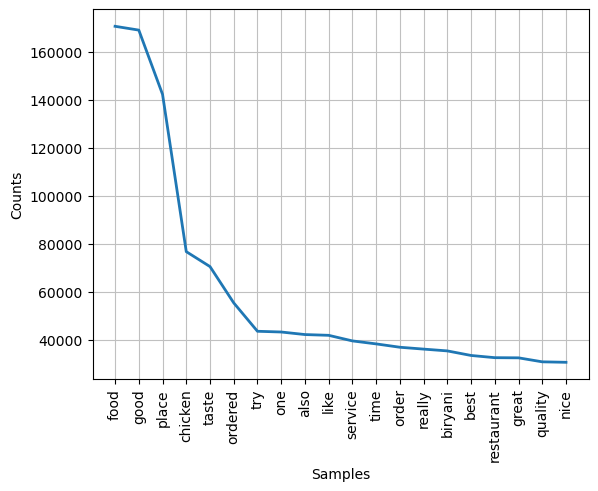

<Axes: xlabel='Samples', ylabel='Counts'>

In [79]:
fd.plot(20)

### Performing Bi-gram & Trigram analysis on data

In [80]:
from nltk import FreqDist, bigrams, trigrams

In [81]:
#bi-gram analysis

In [82]:
bi_grams = bigrams(total_reviews_1D)

In [83]:
bi_grams

<generator object bigrams at 0x0000027C684D37D0>

In [84]:
fd_bigrams = FreqDist()

for i in bi_grams:
    fd_bigrams[i] = fd_bigrams[i] + 1


In [85]:
fd_bigrams.most_common(20)

[(('must', 'try'), 13250),
 (('good', 'food'), 11534),
 (('food', 'good'), 11139),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8122),
 (('good', 'place'), 8059),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6116),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256),
 (('indian', 'food'), 4992)]

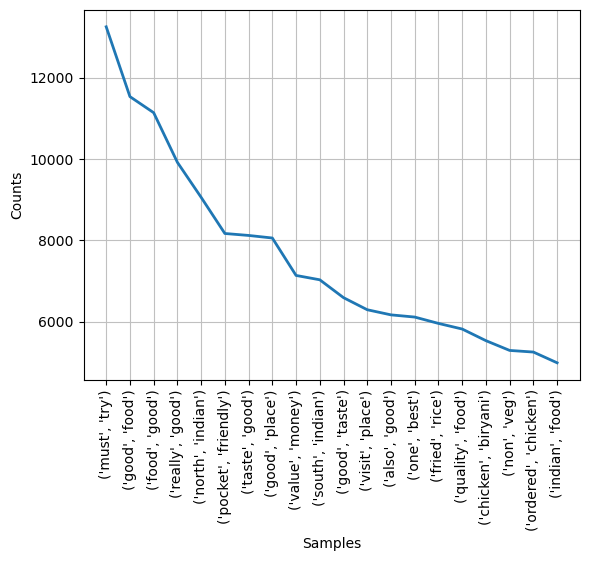

<Axes: xlabel='Samples', ylabel='Counts'>

In [86]:
fd_bigrams.plot(20)

In [87]:
#tri-gram analysis

In [88]:
tri_grams = trigrams(total_reviews_1D)

In [89]:
fd_trigrams = FreqDist()

for i in tri_grams:
    fd_trigrams[i] = fd_trigrams[i] + 1


In [90]:
fd_trigrams.most_common(20)

[(('north', 'indian', 'food'), 3079),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1486),
 (('good', 'food', 'good'), 1367),
 (('ordered', 'chicken', 'biryani'), 1275),
 (('pocket', 'friendly', 'place'), 1059),
 (('chicken', 'fried', 'rice'), 1050),
 (('food', 'really', 'good'), 1021),
 (('veg', 'non', 'veg'), 1013),
 (('worst', 'food', 'ever'), 939),
 (('like', 'home', 'made'), 897),
 (('must', 'try', 'place'), 896),
 (('good', 'taste', 'good'), 827),
 (('good', 'value', 'money'), 825),
 (('south', 'indian', 'breakfast'), 816),
 (('home', 'made', 'food'), 787),
 (('food', 'reasonable', 'price'), 746),
 (('good', 'quality', 'food'), 732),
 (('ghar', 'ka', 'khana'), 693)]

### 7. Extract geographical-coordinates from data

In [91]:
df.sample(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
45714,45714,https://www.zomato.com/bangalore/coast-1-jeevan-bhima-nagar-bangalore?contex...,"1648/3, Basement, Rannaghar Restaurant, Opposite Miranda School, HAL, 3rd St...",Coast,Yes,No,3.2,108,+91 9164200018,Jeevan Bhima Nagar,Casual Dining,Neer Dosa,"Seafood, Mangalorean, North Indian, Biryani",750,"[('Rated 5.0', 'RATED\n Without a miss, these guys are a place to definitel...",[],Dine-out,Old Airport Road
10706,10706,https://www.zomato.com/bangalore/hungry-buddies-btm-bangalore?context=eyJzZS...,"17, 19th Cross, 7th Main Road, NS Palya, BTM 2nd Stage, BTM, Bangalore",Hungry Buddies,No,No,3.3,33,+91 9606259513\r\r\n+91 7619546574,BTM,Quick Bites,None,North Indian,150,"[('Rated 1.0', 'RATED\n Really worst experience with this restaurant I just...",[],Dine-out,BTM
11793,11793,https://www.zomato.com/bangalore/five-star-chicken-wilson-garden-bangalore?c...,"299, B.T..S. Main Road, 14th Cross, Wilson Garden, Bangalore",Five Star Chicken,Yes,No,3.5,11,+91 8660142161\r\r\r\n+91 8919920448,Wilson Garden,Quick Bites,None,"Fast Food, Burger",200,"[('Rated 3.0', 'RATED\n ordered cheesey Chicken sorts ,crispy chicken burge...",[],Delivery,Church Street


In [92]:
# install geocoder
# pip install geocoder
# install geopy
# pip install geopy

In [93]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [94]:
len(df["location"].unique())

94

In [95]:
df["location"] = df["location"] + ", Bangalore, Karnataka, India"

In [96]:
df["location"].unique()

array(['Banashankari, Bangalore, Karnataka, India',
       'Basavanagudi, Bangalore, Karnataka, India',
       'Mysore Road, Bangalore, Karnataka, India',
       'Jayanagar, Bangalore, Karnataka, India',
       'Kumaraswamy Layout, Bangalore, Karnataka, India',
       'Rajarajeshwari Nagar, Bangalore, Karnataka, India',
       'Vijay Nagar, Bangalore, Karnataka, India',
       'Uttarahalli, Bangalore, Karnataka, India',
       'JP Nagar, Bangalore, Karnataka, India',
       'South Bangalore, Bangalore, Karnataka, India',
       'City Market, Bangalore, Karnataka, India',
       'Nagarbhavi, Bangalore, Karnataka, India',
       'Bannerghatta Road, Bangalore, Karnataka, India',
       'BTM, Bangalore, Karnataka, India',
       'Kanakapura Road, Bangalore, Karnataka, India',
       'Bommanahalli, Bangalore, Karnataka, India', nan,
       'CV Raman Nagar, Bangalore, Karnataka, India',
       'Electronic City, Bangalore, Karnataka, India',
       'HSR, Bangalore, Karnataka, India',
       '

In [97]:
df_copy = df.copy()

In [98]:
df_copy["location"].isna().sum()

21

In [99]:
df_copy = df_copy.dropna(subset=["location"])

In [100]:
df_copy["location"].isna().sum()

0

In [101]:
locations = pd.DataFrame()

In [102]:
locations["name"] = df_copy["location"].unique()

In [103]:
locations

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [104]:
from geopy.geocoders import Nominatim

In [105]:
geolocater = Nominatim(user_agent="app", timeout=None)

In [106]:
lat=[]
lon=[]

for location in locations["name"]:
    loc=geolocater.geocode(location)
    if loc is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(loc.latitude)
        lon.append(loc.longitude)


In [107]:
locations["latitude"] = lat
locations["longitude"] = lon

In [108]:
locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


### 8. Let's build geographical Heat-Maps

In [109]:
df_copy["location"].str.contains("BTM").sum()

5124

In [110]:
locations.isna().sum()

name         0
latitude     3
longitude    3
dtype: int64

In [111]:
locations[locations["latitude"].isna()]

,name,latitude,longitude
45,"St. Marks Road, Bangalore, Karnataka, India",NaN,NaN
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [112]:
locations["latitude"][45] = 12.9764122
locations["longitude"][45] = 77.6017437

C:\Users\prash\AppData\Local\Temp\ipykernel_9508\46573892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations["latitude"][45] = 12.9764122
C:\Users\prash\AppData\Local\Temp\ipykernel_9508\46573892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations["longitude"][45] = 77.6017437


In [113]:
locations["latitude"][79] = 13.0163
locations["longitude"][79] = 77.6785

C:\Users\prash\AppData\Local\Temp\ipykernel_9508\920951252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations["latitude"][79] = 13.0163
C:\Users\prash\AppData\Local\Temp\ipykernel_9508\920951252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations["longitude"][79] = 77.6785


In [114]:
locations["latitude"][85] = 13.0068
locations["longitude"][85] = 77.5813

C:\Users\prash\AppData\Local\Temp\ipykernel_9508\3371174332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations["latitude"][85] = 13.0068
C:\Users\prash\AppData\Local\Temp\ipykernel_9508\3371174332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations["longitude"][85] = 77.5813


In [115]:
locations.isna().sum()

name         0
latitude     0
longitude    0
dtype: int64

In [116]:
n_df = df.dropna(subset=["cuisines"])

In [117]:
north_india = n_df[n_df['cuisines'].str.contains("North Indian")]

In [118]:
north_india.shape

(21085, 18)

In [119]:
z = north_india.groupby("location")["url"].count().reset_index()

In [120]:
z.rename(columns={"url":"count","location":"name"},inplace=True)

In [121]:
z

,name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"Banashankari, Bangalore, Karnataka, India",309
2,"Banaswadi, Bangalore, Karnataka, India",227
3,"Bannerghatta Road, Bangalore, Karnataka, India",701
4,"Basavanagudi, Bangalore, Karnataka, India",189
...,...,...
85,"Vijay Nagar, Bangalore, Karnataka, India",35
86,"West Bangalore, Bangalore, Karnataka, India",1
87,"Whitefield, Bangalore, Karnataka, India",1059
88,"Wilson Garden, Bangalore, Karnataka, India",132


In [122]:
heatmap_df = pd.merge(z,locations,on="name",how="left")

In [123]:
heatmap_df

,name,count,latitude,longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"Banashankari, Bangalore, Karnataka, India",309,12.915221,77.573598
2,"Banaswadi, Bangalore, Karnataka, India",227,13.014162,77.651854
3,"Bannerghatta Road, Bangalore, Karnataka, India",701,12.910648,77.600141
4,"Basavanagudi, Bangalore, Karnataka, India",189,12.941726,77.575502
...,...,...,...,...
85,"Vijay Nagar, Bangalore, Karnataka, India",35,12.965863,77.612473
86,"West Bangalore, Bangalore, Karnataka, India",1,13.022235,77.567183
87,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
88,"Wilson Garden, Bangalore, Karnataka, India",132,12.948934,77.596827


In [124]:
import folium

In [125]:
basemap = folium.Map()

In [126]:
basemap

In [130]:
from folium.plugins import HeatMap

In [128]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [135]:
HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)

In [136]:
basemap

### 9. How to automate your task i.e. Perform Automation

In [149]:
def get_heatmap(cuisine):
    c_df = n_df[n_df['cuisines'].str.contains(cuisine)]
    res_count_df = c_df.groupby("location")["url"].count().reset_index()
    res_count_df.rename(columns={"url":"count","location":"name"},inplace=True)
    hm_df = pd.merge(res_count_df, locations, on="name", how="left")
    bp = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(bp)
    display(bp)
    

In [150]:
get_heatmap("South Indian")